<a href="https://colab.research.google.com/github/anil50prasad/hello-world/blob/master/TundishTemp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tundish Temperature Prediction at CC3**


Import necessary files

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 


2) From a local drive
To upload from your local drive, start with the following code:
from google.colab import files
uploaded = files.upload()
It will prompt you to select a file. Click on “Choose Files” then select and upload the file. Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
Finally, type in the following code to import it into a dataframe (make sure the filename matches the name of the uploaded file).
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))
# Dataset is now stored in a Pandas Dataframe

In [2]:
from google.colab import files
uploaded = files.upload()

Saving LF3CC3Data.xlsx to LF3CC3Data.xlsx


In [0]:
import io

df2 = pd.read_excel(io.BytesIO(uploaded['LF3CC3Data.xlsx']))
# Dataset is now stored in a Pandas Dataframe

In [0]:
#from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
df2=df2.ffill(inplace=False)
df2.head()

,Arcing Duration (Min),Purging Duration (Min),Power (MW),Total AR (NM^3),LF In Temp,LF Out Temp,Purging,Lime,Tap Temp,Tap End Cast Start Time (Min),Tap End to LF in Time (Min),Toplance Purging Duration (Min),Turn Around Time (Min),Temp1,Temp2
0,21.7,40.5,5.6,5.79,1584.0,1586.0,1,NaN,1647.0,80.0,25.0,0,203.0,1554.0,1552.0
1,8.0,16.3,2.1,1.64,1594.0,1594.0,1,251.0,1691.0,60.0,18.0,0,134.0,1553.0,1548.0
2,8.1,18.5,3.5,0.00,1566.0,1592.0,1,201.0,1670.0,55.0,22.0,1,134.0,1553.0,1548.0
3,27.3,36.1,3.5,0.00,1533.0,1563.0,1,435.0,1610.0,72.0,23.0,0,134.0,1542.0,1533.0
4,11.9,20.3,3.5,0.00,1575.0,1586.0,1,332.0,1684.0,67.0,25.0,0,158.0,1544.0,1546.0


In [22]:
df2=df2.bfill(inplace=False)
df2.head()

,Arcing Duration (Min),Purging Duration (Min),Power (MW),Total AR (NM^3),LF In Temp,LF Out Temp,Purging,Lime,Tap Temp,Tap End Cast Start Time (Min),Tap End to LF in Time (Min),Toplance Purging Duration (Min),Turn Around Time (Min),Temp1,Temp2
0,21.7,40.5,5.6,5.79,1584.0,1586.0,1,251.0,1647.0,80.0,25.0,0,203.0,1554.0,1552.0
1,8.0,16.3,2.1,1.64,1594.0,1594.0,1,251.0,1691.0,60.0,18.0,0,134.0,1553.0,1548.0
2,8.1,18.5,3.5,0.00,1566.0,1592.0,1,201.0,1670.0,55.0,22.0,1,134.0,1553.0,1548.0
3,27.3,36.1,3.5,0.00,1533.0,1563.0,1,435.0,1610.0,72.0,23.0,0,134.0,1542.0,1533.0
4,11.9,20.3,3.5,0.00,1575.0,1586.0,1,332.0,1684.0,67.0,25.0,0,158.0,1544.0,1546.0


In [23]:
df2.head()


,Arcing Duration (Min),Purging Duration (Min),Power (MW),Total AR (NM^3),LF In Temp,LF Out Temp,Purging,Lime,Tap Temp,Tap End Cast Start Time (Min),Tap End to LF in Time (Min),Toplance Purging Duration (Min),Turn Around Time (Min),Temp1,Temp2
0,21.7,40.5,5.6,5.79,1584.0,1586.0,1,251.0,1647.0,80.0,25.0,0,203.0,1554.0,1552.0
1,8.0,16.3,2.1,1.64,1594.0,1594.0,1,251.0,1691.0,60.0,18.0,0,134.0,1553.0,1548.0
2,8.1,18.5,3.5,0.00,1566.0,1592.0,1,201.0,1670.0,55.0,22.0,1,134.0,1553.0,1548.0
3,27.3,36.1,3.5,0.00,1533.0,1563.0,1,435.0,1610.0,72.0,23.0,0,134.0,1542.0,1533.0
4,11.9,20.3,3.5,0.00,1575.0,1586.0,1,332.0,1684.0,67.0,25.0,0,158.0,1544.0,1546.0


AttributeError: ignored

# understanding our data

In [24]:
df2.describe()

,Arcing Duration (Min),Purging Duration (Min),Power (MW),Total AR (NM^3),LF In Temp,LF Out Temp,Purging,Lime,Tap Temp,Tap End Cast Start Time (Min),Tap End to LF in Time (Min),Toplance Purging Duration (Min),Turn Around Time (Min),Temp1,Temp2
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,23.270588,42.032888,5.556417,4.180802,1570.090909,1597.609626,1.069519,356.863636,1660.807487,103.168449,39.735294,1.056150,151.179144,1557.596257,1554.470588
std,7.637571,14.099971,2.010655,1.828462,21.321169,14.308831,0.336328,161.793004,23.992857,35.787142,25.786959,4.999148,78.477964,11.784713,17.254224
min,4.600000,2.400000,0.000000,0.000000,1515.000000,1563.000000,1.000000,63.000000,1602.000000,54.000000,-4.000000,0.000000,49.000000,1516.000000,1340.000000
25%,18.200000,35.225000,4.100000,3.102500,1554.000000,1587.000000,1.000000,237.000000,1647.000000,83.000000,24.250000,0.000000,106.000000,1550.000000,1546.000000
50%,22.900000,40.600000,5.400000,4.005000,1571.000000,1594.000000,1.000000,349.000000,1662.000000,98.500000,35.000000,0.000000,130.000000,1555.000000,1553.000000
75%,27.775000,46.400000,6.700000,5.000000,1585.000000,1608.000000,1.000000,453.000000,1675.000000,116.000000,49.000000,0.000000,166.500000,1566.000000,1564.000000
max,58.500000,128.600000,15.200000,11.520000,1622.000000,1635.000000,3.000000,1095.000000,1725.000000,432.000000,362.000000,46.000000,521.000000,1591.000000,1588.000000


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
Arcing Duration (Min)              374 non-null float64
Purging Duration (Min)             374 non-null float64
Power (MW)                         374 non-null float64
Total AR (NM^3)                    374 non-null float64
LF In Temp                         374 non-null float64
LF Out Temp                        374 non-null float64
Purging                            374 non-null int64
Lime                               374 non-null float64
Tap Temp                           374 non-null float64
Tap End Cast Start Time (Min)      374 non-null float64
Tap End to LF in Time (Min)        374 non-null float64
Toplance Purging Duration (Min)    374 non-null int64
Turn Around Time (Min)             374 non-null float64
Temp1                              374 non-null float64
Temp2                              374 non-null float64
dtypes: float64(13), int64(2)
memory usage: 44.0 KB


In [26]:
df2.isnull().sum()

Arcing Duration (Min)              0
Purging Duration (Min)             0
Power (MW)                         0
Total AR (NM^3)                    0
LF In Temp                         0
LF Out Temp                        0
Purging                            0
Lime                               0
Tap Temp                           0
Tap End Cast Start Time (Min)      0
Tap End to LF in Time (Min)        0
Toplance Purging Duration (Min)    0
Turn Around Time (Min)             0
Temp1                              0
Temp2                              0
dtype: int64

# Data Visualization

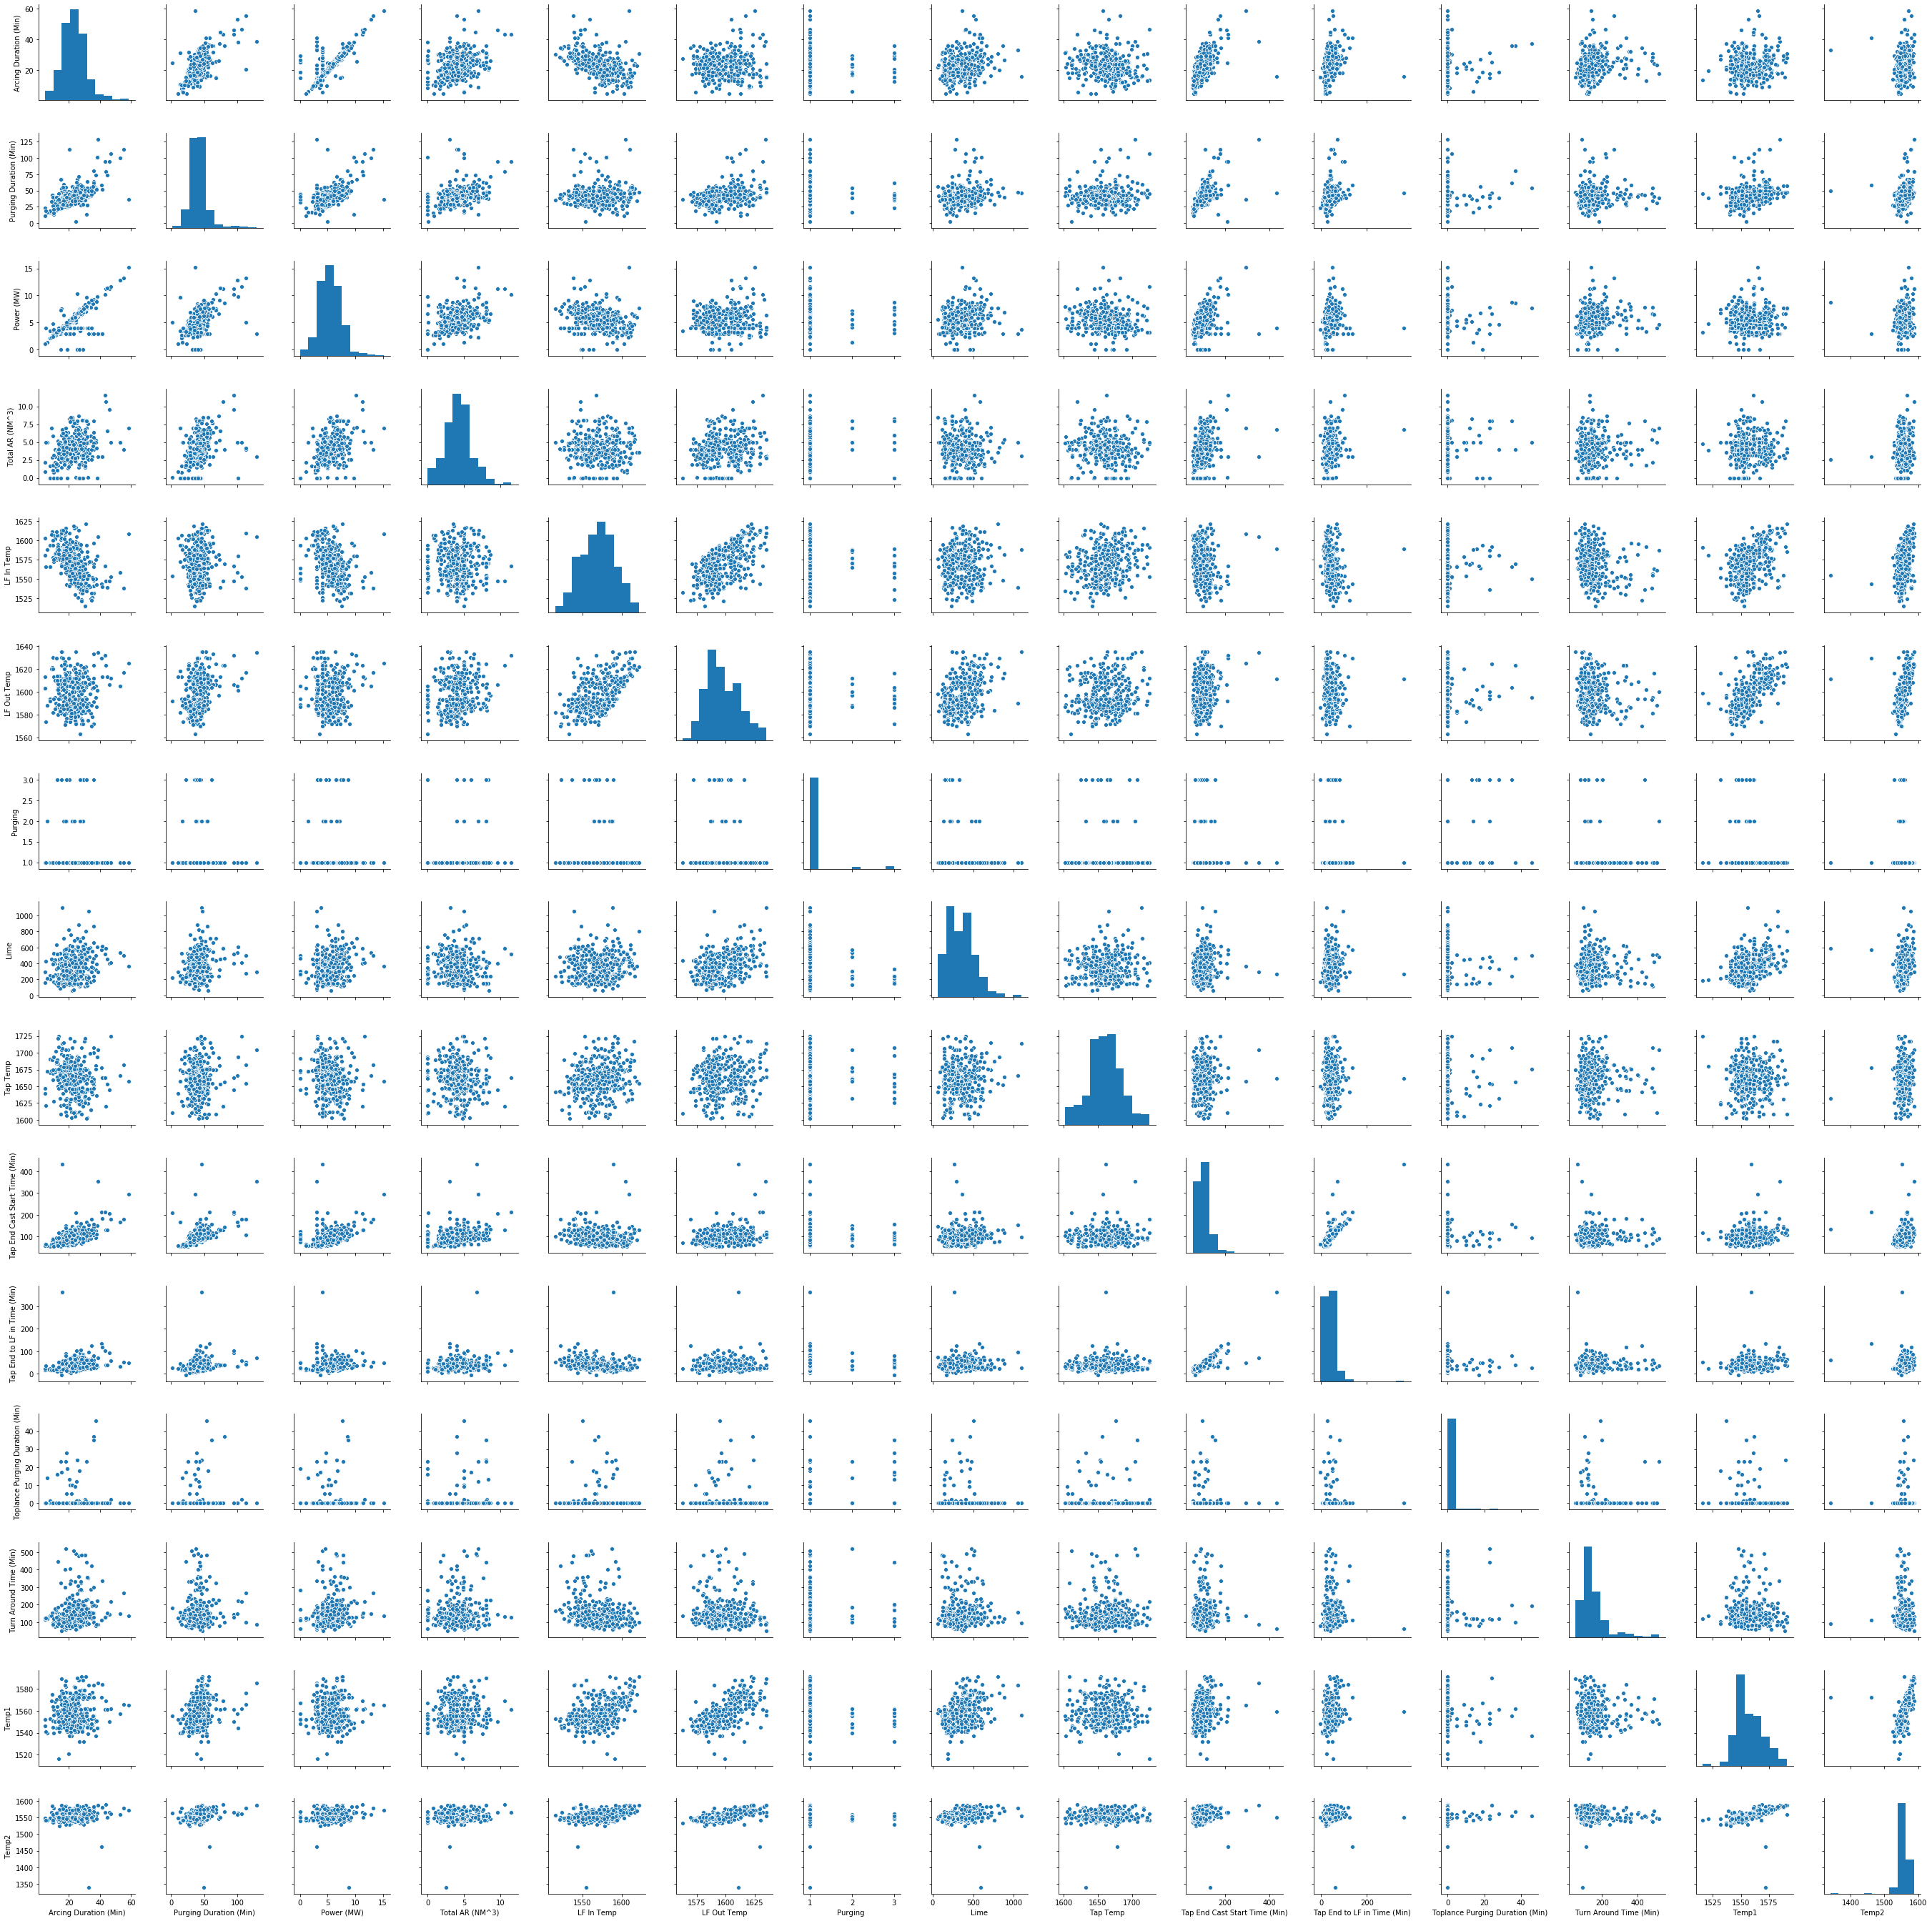

In [27]:
sns.pairplot(df2)

IndexError: ignored

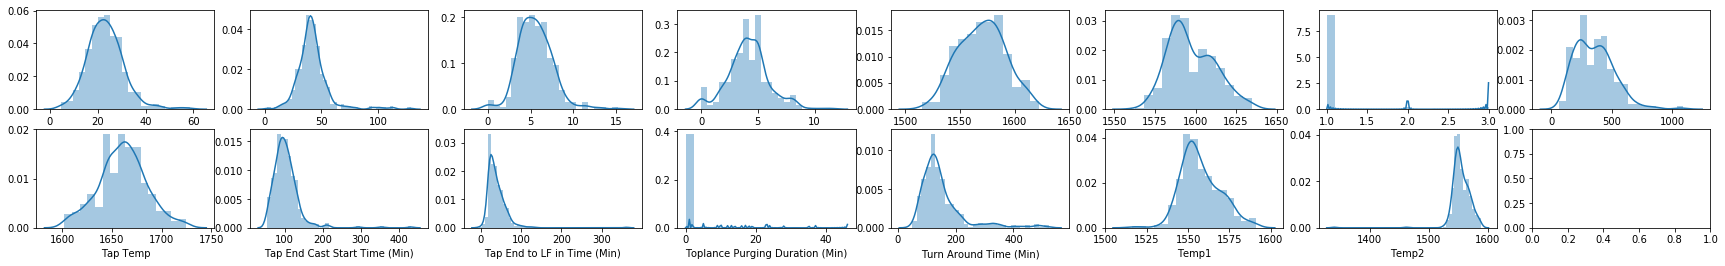

In [31]:
rows=2
cols=8
fig, ax=plt.subplots(nrows=rows,ncols=cols, figsize=(30,4))
col=df2.columns
index=0
for i in range(rows):
  for j in range(cols):
    sns.distplot(df2[col[index]], ax=ax[i][j])
    index=index + 1
plt.tight_layout()

In [32]:
corrmat = df2.corr()
corrmat

,Arcing Duration (Min),Purging Duration (Min),Power (MW),Total AR (NM^3),LF In Temp,LF Out Temp,Purging,Lime,Tap Temp,Tap End Cast Start Time (Min),Tap End to LF in Time (Min),Toplance Purging Duration (Min),Turn Around Time (Min),Temp1,Temp2
Arcing Duration (Min),1.000000,0.596671,0.764294,0.293373,-0.481770,0.087236,-0.007551,0.225072,-0.126099,0.543781,0.304867,0.051828,0.191030,0.120481,0.064362
Purging Duration (Min),0.596671,1.000000,0.522366,0.348360,0.024518,0.353191,-0.022645,0.178621,0.085888,0.532116,0.238499,0.051415,0.039430,0.253660,0.202525
Power (MW),0.764294,0.522366,1.000000,0.389764,-0.311058,0.104837,0.015990,0.151366,-0.120192,0.365479,0.161466,0.021528,0.154915,0.067391,0.084015
Total AR (NM^3),0.293373,0.348360,0.389764,1.000000,-0.009177,0.162076,0.143338,-0.025602,-0.055421,0.271991,0.192226,0.093378,0.073308,0.040785,0.113739
LF In Temp,-0.481770,0.024518,-0.311058,-0.009177,1.000000,0.564437,-0.039018,0.084916,0.229435,-0.112294,-0.229527,0.004580,-0.212512,0.415537,0.327250
LF Out Temp,0.087236,0.353191,0.104837,0.162076,0.564437,1.000000,-0.024986,0.401124,0.108672,0.254497,0.083858,0.032764,-0.074033,0.665117,0.429298
Purging,-0.007551,-0.022645,0.015990,0.143338,-0.039018,-0.024986,1.000000,-0.137875,0.012294,-0.006321,0.023766,0.436167,0.057932,-0.107213,-0.037530
Lime,0.225072,0.178621,0.151366,-0.025602,0.084916,0.401124,-0.137875,1.000000,0.064579,0.074169,0.056925,-0.020316,0.013494,0.419615,0.229668
Tap Temp,-0.126099,0.085888,-0.120192,-0.055421,0.229435,0.108672,0.012294,0.064579,1.000000,0.046164,0.023382,-0.001944,0.030315,0.014336,0.047864
Tap End Cast Start Time (Min),0.543781,0.532116,0.365479,0.271991,-0.112294,0.254497,-0.006321,0.074169,0.046164,1.000000,0.810882,0.003409,0.014096,0.201510,0.115528


ValueError: ignored

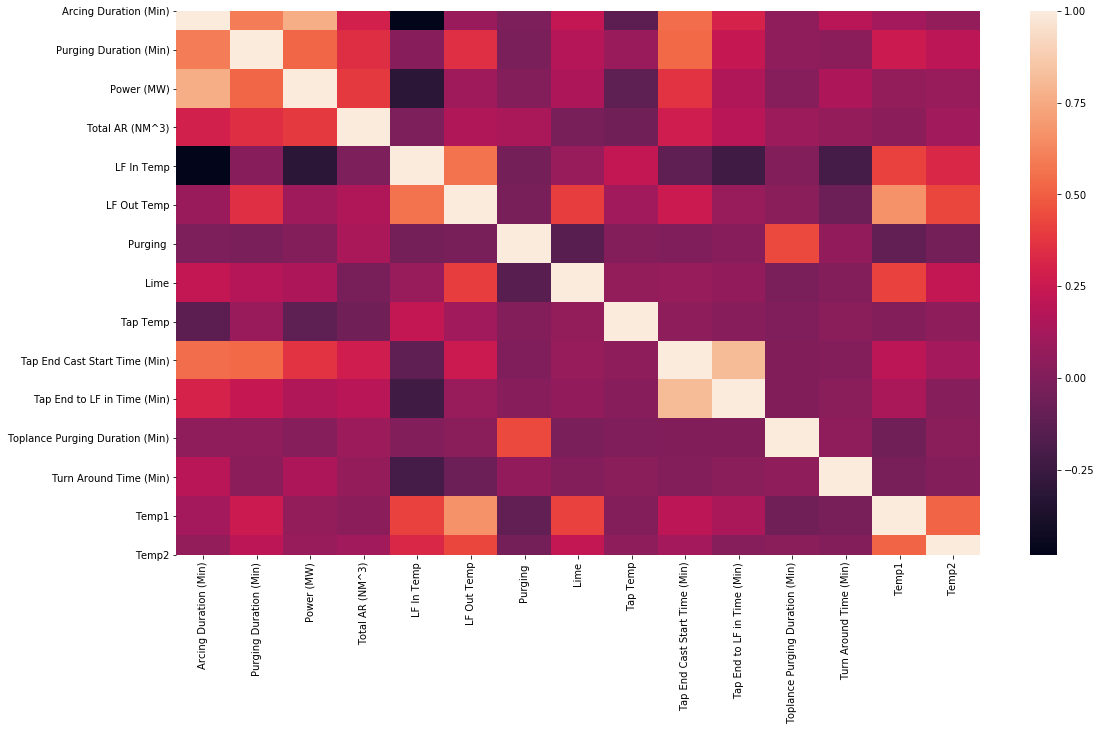

In [33]:
fig, ax=plt.subplots(figsize = (18,10))
sns.heatmap(corrmat,annot=True,annot_kws=['size',12])

In [0]:
def getCorrelatedFeature(corrdf2, threshold):
  feature=[]
  value=[]

  for i, index in enumerate(corrdf2,index):
    if abs(corrdf2[index])>threshold:
      feature.append(index)
      value.append(corrdf2[index])

    df=pd.DataFrame(df2=value,index=feature, colums=['Corr value'])
    return df

In [35]:
threshold = 0.5
corr_value = getCorrelatedFeature(corrmat['Temp1'], threshold)
corr_value

UnboundLocalError: ignored

In [36]:
corr_value.index.values

NameError: ignored

In [37]:
X= df2
y=df2['Temp1']
X.head()


,Arcing Duration (Min),Purging Duration (Min),Power (MW),Total AR (NM^3),LF In Temp,LF Out Temp,Purging,Lime,Tap Temp,Tap End Cast Start Time (Min),Tap End to LF in Time (Min),Toplance Purging Duration (Min),Turn Around Time (Min),Temp1,Temp2
0,21.7,40.5,5.6,5.79,1584.0,1586.0,1,251.0,1647.0,80.0,25.0,0,203.0,1554.0,1552.0
1,8.0,16.3,2.1,1.64,1594.0,1594.0,1,251.0,1691.0,60.0,18.0,0,134.0,1553.0,1548.0
2,8.1,18.5,3.5,0.00,1566.0,1592.0,1,201.0,1670.0,55.0,22.0,1,134.0,1553.0,1548.0
3,27.3,36.1,3.5,0.00,1533.0,1563.0,1,435.0,1610.0,72.0,23.0,0,134.0,1542.0,1533.0
4,11.9,20.3,3.5,0.00,1575.0,1586.0,1,332.0,1684.0,67.0,25.0,0,158.0,1544.0,1546.0


In [0]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [40]:
X_train.shape, X_test.shape

((299, 15), (75, 15))

### Lets train the Model

In [41]:
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_predict = model.predict(X_test)

In [44]:
df = pd.DataFrame(data = [y_predict, y_test])
df.T

,0,1
0,1555.0,1555.0
1,1553.0,1553.0
2,1549.0,1549.0
3,1546.0,1546.0
4,1541.0,1541.0
...,...,...
70,1567.0,1567.0
71,1551.0,1551.0
72,1556.0,1556.0
73,1550.0,1550.0


# 
Defining performance metrics
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the coefficient of determination, R2, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 always fails to predict the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.

For the performance_metric function in the code cell below, you will need to implement the following:

Use r2_score from sklearn.metrics to perform a performance calculation between y_true and y_predict. Assign the performance score to the score variable.

image.png

image.png

Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.